In [1]:
from rmgpy import settings
from rmgpy.data.rmg import RMGDatabase
from rmgpy.species import Species
from IPython.display import display

In [2]:
database = RMGDatabase()

In [3]:
database.load(settings['database.directory'], thermoLibraries='none',\
             kineticsFamilies='none', kineticsDepositories='none', reactionLibraries = [])

thermoDatabase = database.thermo

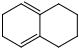

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([203.342,259.994,306.52,343.172,398.819,438.232,496.306],'J/(mol*K)'), H298=(25.2714,'kJ/mol'), S298=(187.36,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cds-Cds(Cds-Cds)Cs) + other(R) + group(Cds-Cds(Cds-Cds)Cs) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-CdsCsH) + other(R) + polycyclic(PolycyclicRing)""")

In [4]:
spec1 = Species().fromSMILES('C1CC=C2CCCCC2=C1')
display(spec1)
mole1 = spec1.molecule[0]
thermoDatabase.computeGroupAdditivityThermo(mole1)

In [5]:
ring_database = thermoDatabase.groups['polycyclic']

In [6]:
from rmgpy.molecule.group import Group
from rmgpy.data.base import LogicNode
root = ring_database.top[0]
count = 0
for l2_entry in root.children:
    mom = l2_entry
    momgroup = mom.item
    
    count += 1
    print count, mom.label

    for daughter in mom.children:
        daughtergroup=daughter.item
        if isinstance(daughtergroup, Group):
            daughtergroup.clearLabeledAtoms()
            daughtergroup.sortVertices()
            for atom in daughtergroup.atoms:
                initialMap =  {}
                initialMap[atom]=momgroup.getLabeledAtoms()['*']
                success = daughtergroup.findSubgraphIsomorphisms(momgroup, initialMap=initialMap)
                if success:
                    atom.label = '*'
                    
                    count += 1
                    print count, daughter.label
                    break
            else:
                    print 'fail: ' + daughter.label
        elif isinstance(daughtergroup, LogicNode):
            
            count += 1
            print count, daughter.label
            for grandchild in daughter.children:
                grandchildgroup = grandchild.item
                if isinstance(grandchildgroup, Group):
                    grandchildgroup.clearLabeledAtoms()
                    grandchildgroup.sortVertices()
                    for atom in grandchildgroup.atoms:
                        initialMap =  {}
                        initialMap[atom]=momgroup.getLabeledAtoms()['*']
                        success = grandchildgroup.findSubgraphIsomorphisms(momgroup, initialMap=initialMap)
                        if success:
                            atom.label = '*'
                            
                            count += 1
                            print count, grandchild.label
                            break
                    else:
                        print 'fail: ' + grandchild.label

1 s1_3_3
2 s1_3_3_ane
3 s1_3_3_ene
4 s1_3_4
5 s1_3_4_ane
6 s1_3_4_ene
7 s1_3_5
8 s1_3_5_ane
9 s1_3_5_ene
10 s1_3_5_ene_1
11 s1_3_5_ene_2
12 s1_3_5_diene
13 s1_3_5_diene_1_3
14 s1_3_6
15 s1_3_6_ane
16 s1_3_6_ene
17 s1_3_6_ene_1
18 s1_3_6_ene_2
19 s1_3_6_diene
20 s1_3_6_diene_1_4
21 s1_3_6_diene_1_3
22 s1_4_4
23 s1_4_4_ane
24 s1_4_4_ene
25 s1_4_4_diene
26 s1_4_5
27 s1_4_5_ane
28 s1_4_5_ene
29 s1_4_5_ene_1
30 s1_4_5_ene_2
31 s1_4_5_ene_6
32 s1_4_5_diene
33 s1_4_5_diene_1_3
34 s1_4_5_diene_1_6
35 s1_4_5_diene_2_6
36 s1_4_6
37 s1_4_6_ane
38 s1_4_6_ene
39 s1_4_6_ene_1
40 s1_4_6_ene_2
41 s1_4_6_ene_7
42 s1_4_6_diene
43 s1_4_6_diene_1_3
44 s1_4_6_diene_1_4
45 s1_4_6_diene_1_7
46 s1_4_6_diene_2_7
47 s1_5_5
48 s1_5_5_ane
49 s1_5_5_ene
50 s1_5_5_ene_1
51 s1_5_5_ene_2
52 s1_5_5_diene
53 s1_5_5_diene_1_3
54 s1_5_5_diene_1_6
55 s1_5_5_diene_1_7
56 s1_5_5_diene_2_7
57 s1_5_6
58 s1_5_6_ane
59 s1_5_6_ene
60 s1_5_6_ene_1
61 s1_5_6_ene_2
62 s1_5_6_ene_7
63 s1_5_6_ene_8
64 s1_5_6_diene
65 s1_5_6_diene_1_3

In [7]:
thermoDatabase.groups['polycyclic'].save('polycyclic_s3_right_label.py')